In [43]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
df = pd.read_csv('tweets.csv',encoding= "ISO-8859–1")
df.head(10)

tweet_id         airline        name  retweet_count  \
0  5.703061e+17  Virgin America     cairdin              0   
1  5.703011e+17  Virgin America    jnardino              0   
2  5.703011e+17  Virgin America  yvonnalynn              0   
3  5.703010e+17  Virgin America    jnardino              0   
4  5.703008e+17  Virgin America    jnardino              0   
5  5.703008e+17  Virgin America    jnardino              0   
6  5.703006e+17  Virgin America  cjmcginnis              0   
7  5.703002e+17  Virgin America       pilot              0   
8  5.703000e+17  Virgin America    dhepburn              0   
9  5.702955e+17  Virgin America  YupitsTate              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   
5  @VirginAmerica seriously would pay $30 a fligh...         NaN   
6  @VirginAmerica yes, nearly every time I fly VX...         NaN   
7  @VirginAmerica Really missed a prime opportuni...         NaN   
8  @virginamerica Well, I didn'tâ¦but NOW I DO! :-D         NaN   
9  @VirginAmerica it was amazing, and arrived an ...         NaN   

               tweet_created    tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800               NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800               NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800         Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800               NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800               NaN  Pacific Time (US & Canada)  
5  2015-02-24 11:14:33 -0800               NaN  Pacific Time (US & Canada)  
6  2015-02-24 11:13:57 -0800  San Francisco CA  Pacific Time (US & Canada)  
7  2015-02-24 11:12:29 -0800       Los Angeles  Pacific Time (US & Canada)  
8  2015-02-24 11:11:19 -0800         San Diego  Pacific Time (US & Canada)  
9  2015-02-24 10:53:27 -0800       Los Angeles  Eastern Time (US & Canada)

In [44]:
df.columns

Index(['tweet_id', 'airline', 'name', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [45]:
df.isnull().sum()

tweet_id              0
airline               0
name                  0
retweet_count         0
text                  0
tweet_coord       13621
tweet_created         0
tweet_location     4733
user_timezone      4820
dtype: int64

In [46]:
df.tweet_location.value_counts()

Boston, MA          157
New York, NY        156
Washington, DC      150
New York            137
USA                 128
                   ... 
Seat 3A, Always       1
Phila. PA             1
Rozelle, NSW          1
South Carloina        1
Natick, MA, USA       1
Name: tweet_location, Length: 3022, dtype: int64

In [47]:
df.user_timezone.value_counts()

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                          738
Atlantic Time (Canada)         497
                              ... 
Saskatchewan                     1
Prague                           1
Bucharest                        1
Pretoria                         1
Lisbon                           1
Name: user_timezone, Length: 85, dtype: int64

In [48]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

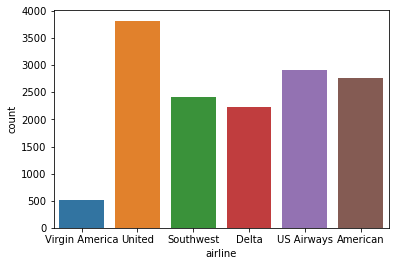

In [49]:
sns.countplot(df.airline)

In [50]:
df.text[279]
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

@VirginAmerica what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.


In [51]:
re.sub(r'@[A-Za-z0-9]+','',df.text[279])

' what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.'

In [52]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

nums = [0,14640]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    #print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ) )  
   
        clean_tweet_texts.append(tweet_cleaner(df['text'][i]))
    

#For the rest, you get the idea, I divided the whole dataset into four batches.Saving cleaned data as csv
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['airline'] = df.airline
clean_df.head()

clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
new_df = pd.read_csv(csv,index_col=0)
new_df.to_csv('Final.csv', mode='w', index=False, encoding="utf-8")
final_df = pd.read_csv('Final.csv')
print('The Parsing is complete')

Cleaning and parsing the tweets...

The Parsing is complete


In [53]:
#Test whether the text has been parsed or not 
final_df.head()

text         airline
0                                          what said  Virgin America
1  plus you ve added commercials to the experienc...  Virgin America
2  i didn t today must mean i need to take anothe...  Virgin America
3  it s really aggressive to blast obnoxious ente...  Virgin America
4           and it s a really big bad thing about it  Virgin America

In [54]:
final_df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [55]:
COLS = ['airline','sentiment','subjectivity','polarity']

In [56]:
clean_tweets = []
for tweet in final_df.text:
    clean_tweets.append(tweet_cleaner(tweet))
final_df['clean_text'] = pd.DataFrame(clean_tweets)

In [57]:
polarity = []
for tweet in clean_tweets:
    #print (tweet)
    analysis = TextBlob(tweet)
    print (tweet ,analysis.sentiment)
    polarity.append(analysis.sentiment.polarity)
final_df['polarity'] = pd.DataFrame(polarity)

what said Sentiment(polarity=0.0, subjectivity=0.0)
plus you ve added commercials to the experience tacky Sentiment(polarity=0.0, subjectivity=0.0)
i didn t today must mean i need to take another trip Sentiment(polarity=-0.3125, subjectivity=0.6875)
it s really aggressive to blast obnoxious entertainment in your guests faces they have little recourse Sentiment(polarity=0.0062500000000000056, subjectivity=0.35)
and it s a really big bad thing about it Sentiment(polarity=-0.3499999999999999, subjectivity=0.3833333333333333)
seriously would pay a flight for seats that didn t have this playing it s really the only bad thing about flying va Sentiment(polarity=-0.2083333333333333, subjectivity=0.6333333333333333)
yes nearly every time i fly vx this ear worm won t go away Sentiment(polarity=0.45, subjectivity=0.65)
really missed a prime opportunity for men without hats parody there Sentiment(polarity=0.2, subjectivity=0.2)
well i didn t but now i do d Sentiment(polarity=0.0, subjectivity=0.0)

i heard he has a virgin mobile hotspot Sentiment(polarity=0.0, subjectivity=0.0)
you got cheese plate flights too Sentiment(polarity=0.0, subjectivity=0.0)
on all your flights Sentiment(polarity=0.0, subjectivity=0.0)
dad on segway is the best part of this whole infographic Sentiment(polarity=0.6, subjectivity=0.35)
are there any plans for a short haul airline in europe would defiantly fly with you guys Sentiment(polarity=0.4, subjectivity=0.6)
wifi and better seating Sentiment(polarity=0.5, subjectivity=0.5)
how come abc is the only one of the network channels you don t have Sentiment(polarity=0.0, subjectivity=1.0)
started my flight with a scolding for using an overhead bin that was then offered to the person seated next to me Sentiment(polarity=0.0, subjectivity=0.0)
not only was it great but you return my calls the day after couldn t ask for more myvxexperience Sentiment(polarity=0.43333333333333335, subjectivity=0.75)
while other airlines weren t cancelled flighting flights into b

thank you for responding so quickly with a helpful tool Sentiment(polarity=0.3333333333333333, subjectivity=0.5)
boarding time shows min and your gate agent started at showed up at and they had to check bag Sentiment(polarity=0.0, subjectivity=0.0)
agent in las letting customers know they can t help them rebook delayed flight to den unfriendlyskies Sentiment(polarity=0.0, subjectivity=0.0)
empathizes w my disappointment that stclass flight w nonworking entertainmnt is worth unfriendlyskies Sentiment(polarity=-0.15, subjectivity=0.25)
and when that doesn t work Sentiment(polarity=0.0, subjectivity=0.0)
did you have seen my message today about a mcdonnell douglas dc model i will hear it if you read it goodnight now Sentiment(polarity=0.0, subjectivity=0.0)
searched for mileage tickets to bom couldn t find a single one is saver awards i see how you play earn miles but can t use them Sentiment(polarity=-0.07142857142857142, subjectivity=0.21428571428571427)
flight arrives minutes early but

cancelled flightled a flight cause the crew needed sleep but it s totally okay to wake me up at am just to let me know it s cancelled flightled again Sentiment(polarity=0.5, subjectivity=0.5)
changed my last name for my mileageplus acct on the site in an hour usa had me on hold for mins then days no change yet Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
flight landed hours ago more flights cmh iad last night and still no bag could have driven it from cmh Sentiment(polarity=0.25, subjectivity=0.2833333333333333)
someone should send a note to the revenue management team and ask about all the open bf and gf seats on Sentiment(polarity=0.0, subjectivity=0.5)
do you have a further update on the suitcase today please Sentiment(polarity=0.0, subjectivity=0.5)
literally sucks Sentiment(polarity=-0.3, subjectivity=0.3)
thanks for the upgrade today great way to start my week cc Sentiment(polarity=0.5, subjectivity=0.475)
maybe be hiring your own ground staff at lax when multiple ga

in case you re reading this ua right now d so many oversized carryons taking up too much room enforce your rules Sentiment(polarity=0.32857142857142857, subjectivity=0.41190476190476183)
is an airline where you pay extra to get a better seat but by the time you board your overbooked flight there s no overhead space Sentiment(polarity=0.25, subjectivity=0.3)
okay just requested to follow Sentiment(polarity=0.5, subjectivity=0.5)
thx just dm d conf s mqxc mpwnc any help appreciated Sentiment(polarity=0.2, subjectivity=0.1)
make sure you take care of team team we are Sentiment(polarity=0.5, subjectivity=0.8888888888888888)
delayed hrs flight pit iad finally board the plane sit half hour crew is at their hrs limit we deplane unacceptable Sentiment(polarity=-0.08333333333333333, subjectivity=0.5833333333333334)
stuck in yyz because staff took a break not happy k Sentiment(polarity=-0.4, subjectivity=1.0)
personal device entertainment system is great but with app crashing every mins i m glad

how does that make a flight takeoff on time and regardless it makes me late flight because now i have to wait for my bag at baggage claim Sentiment(polarity=-0.3, subjectivity=0.6)
it s been over hours at what point do you let people off of the plane Sentiment(polarity=0.0, subjectivity=0.0)
trying to get a customer service agent just landed in sfo can t fly with layovers with kids Sentiment(polarity=0.8, subjectivity=0.9)
why are there no early morning flights from hnl to anywhere in the continental us example monday need flight to phl Sentiment(polarity=-0.05, subjectivity=0.3)
nope i gave up maybe they ll deliver it Sentiment(polarity=0.0, subjectivity=0.0)
thanks for the upgrade please try to get my company to approve more business class travel Sentiment(polarity=0.35, subjectivity=0.35)
more and more delays no cs help at all no notifications Sentiment(polarity=0.5, subjectivity=0.5)
and waiting Sentiment(polarity=0.0, subjectivity=0.0)
hoping there is a spare a c for tomorrow have

again horrible service again attitude when asked for information again you make me not want to fly united ever platinummember Sentiment(polarity=-0.09999999999999998, subjectivity=0.95)
and now your rep just hung up on me after over mins on hold because i asked for a supervisor i m furious right now Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
i have a question about my interview process i had only one interview but was the last person is that good or bad Sentiment(polarity=2.7755575615628914e-17, subjectivity=0.5833333333333334)
thank you for hrs at terminal d in dulles airport Sentiment(polarity=0.0, subjectivity=0.0)
go bankrupt again and transfer all of your assets to luv that would be great Sentiment(polarity=0.8, subjectivity=0.75)
landing in chicago saw it once we were already airborne Sentiment(polarity=0.0, subjectivity=0.0)
marcus helped me good agent couldn t fix it flight was listed on website but unavailable to book false advertising much Sentime

i would like a supervisor to talk to now we are waiting for a flight attendant as one just walked off left Sentiment(polarity=0.1, subjectivity=0.2)
what s your phone number customer service question Sentiment(polarity=0.0, subjectivity=0.0)
kids left a kindle fire hd onboard ua ord sfo today row abc def we had the whole row amongst the of us help Sentiment(polarity=0.1, subjectivity=0.2)
understanding the situation we waited and it was opened until pm Sentiment(polarity=0.0, subjectivity=0.0)
we hope to see you on board soon and thanks for the tweet ey Sentiment(polarity=0.2, subjectivity=0.2)
just curious when are you going to to finally learn customerservice Sentiment(polarity=-0.05, subjectivity=1.0)
nice see u have a sense of humor hourdelay just want b home but i ll settle for that beer once safely in the air of course Sentiment(polarity=0.55, subjectivity=0.75)
surprised to go from k last year to nothing this year what happened to the soft landing policy of no more than level Se

australia i m just an aussie cowgirl lookin for my cowboy take me to fort worth estelle says i ll find him there Sentiment(polarity=0.3, subjectivity=0.1)
okay thank you for your help Sentiment(polarity=0.5, subjectivity=0.5)
this is not what captain said your pm flight to san francisco is delayed due to weather ua now departs failagain Sentiment(polarity=-0.125, subjectivity=0.375)
thanks Sentiment(polarity=0.2, subjectivity=0.2)
i bet doesn t turn a thirty minute delay on an original flight into a hour delayed arrive time Sentiment(polarity=0.375, subjectivity=0.75)
is the best way to re unite me with my one true love shopping in usa s fashion capital newyork unitedvusa Sentiment(polarity=0.6166666666666667, subjectivity=0.5166666666666666)
should find a way to distinguish boarding of premier members and credit card holders group is too big Sentiment(polarity=0.0, subjectivity=0.1)
final destination was booked through united but with quantas united has not yet contacted auckland i am

was told by supervisor that united disconnected their customer support so there was nobody to address it now igiveup Sentiment(polarity=0.0, subjectivity=0.0)
your mileageplus signup page is broken Sentiment(polarity=-0.4, subjectivity=0.4)
for wifi just so i can tell my family i m gonna be late flight cause i had to sit in a grounded plane for the past two hours Sentiment(polarity=-0.275, subjectivity=0.425)
fyi continuous texts and emails i am getting about the delay while held captive on the tarmac are not that helpful Sentiment(polarity=0.2, subjectivity=0.6)
so not only were you late flight you broke my luggage handle you paying for a new one Sentiment(polarity=-0.05454545454545454, subjectivity=0.6848484848484849)
no friendly skies from you today hr weather delay in sfo followed by hr mechanical delay while sitting on plane nofun Sentiment(polarity=-0.1875, subjectivity=0.5)
once again your customer service rep was rude i asked a question and in turn got attitude jane was no help

is america s largest airline by passengers carried wonder if this is b c they have a customer service bible anamarketers Sentiment(polarity=0.0, subjectivity=0.0)
vipliveinthevieyard first time we tried to redeem pts for anything it really did not go well disappointed Sentiment(polarity=-0.09999999999999999, subjectivity=0.42777777777777776)
ok thank you i hope so too Sentiment(polarity=0.5, subjectivity=0.5)
is there a way to receive a refund on a trip that was cancelled flight online instead of calling your phone lines are super busy Sentiment(polarity=0.21666666666666667, subjectivity=0.4833333333333333)
moms careers day trip to la intuitlife leanin southwestairlines Sentiment(polarity=0.0, subjectivity=0.0)
is there a resource to check delays cancelled flightlations out of love field flying out tomorrow am and stressed about weather Sentiment(polarity=0.5, subjectivity=0.6)
switching planes due to mechanical problems how does reboarding work was a now at end of long line stuck in m

check out our st grader s school science fair project she loves flying on southwest airlines Sentiment(polarity=0.7, subjectivity=0.9)
ohk thank you b c of the inexpensive airfares that southwest has i can now travel around Sentiment(polarity=0.0, subjectivity=0.0)
my golf bag was broken on the flight i just took what s the process for damage reimbursement Sentiment(polarity=-0.4, subjectivity=0.4)
ridiculous how you want to charge me to change flights even with multiple seats available on the flight i needed Sentiment(polarity=0.022222222222222237, subjectivity=0.4666666666666666)
mad love nyc Sentiment(polarity=-0.0625, subjectivity=0.8)
thanks for cancelled flighting our flight to bos we re stranded in den til wed night the of us will never fly southwest again Sentiment(polarity=-0.1, subjectivity=0.55)
i was trying to find airfare for my family your prices are ridiculous almost more than notmadeofmoney Sentiment(polarity=0.08333333333333334, subjectivity=0.75)
my fav Sentiment(pola

answered my options are a refund or a resched for monday i d miss work so i m paying hundreds for a flight tmw Sentiment(polarity=0.0, subjectivity=0.0)
on hold for over an hour twice terrible Sentiment(polarity=-1.0, subjectivity=1.0)
my flight is cancelled flightled due to weather what next Sentiment(polarity=-0.0625, subjectivity=0.1875)
crazy hold times today over an hour now help Sentiment(polarity=-0.6, subjectivity=0.9)
been on hold for hrs can t get airport flight icy country backroads help pls bna Sentiment(polarity=-0.1, subjectivity=0.1)
stl bos flight today was cancelled flightled online resched form gives an error on hold for past min help terribleservice Sentiment(polarity=-0.25, subjectivity=0.25)
how can we get refund instead of credit for flight that you cancelled flightled we couldn t switch to a flight tomorrow Sentiment(polarity=0.0, subjectivity=0.0)
been on hold for hrs can t get airport flight icy country backroads help pls can a human answer bna Sentiment(polari

is really stepping up their service Sentiment(polarity=0.2, subjectivity=0.2)
this inflight wifi is the absolute worst i d be willing to have paid double for dialup speeds flight Sentiment(polarity=-0.1375, subjectivity=0.6625)
are there any flights from msp to hrl in march i m looking at Sentiment(polarity=0.0, subjectivity=0.0)
yes i know that also noticed you offer a list boarding after a so your programs are too popular Sentiment(polarity=0.6, subjectivity=0.9)
i pay for a service to be delivered whether or not it is your fault shouldn t there be some sort of compensation Sentiment(polarity=0.0, subjectivity=0.0)
a little surprised my early bird got me b from den to kc just now worst i ve had what s up Sentiment(polarity=-0.246875, subjectivity=0.675)
again please accept my apologies for my lame childish tweet you didn t deserve that i remain a loyal sw customer Sentiment(polarity=-0.12222222222222222, subjectivity=0.7944444444444444)
i owe you an apology my tweet was out of frustr

all pieces were found and safely delivered to our home this afternoon Sentiment(polarity=0.5, subjectivity=0.5)
stop ur bs promos of anywhere starting at i click and everywhere i d fly the only place thats is cle nothanks Sentiment(polarity=0.26666666666666666, subjectivity=0.6666666666666666)
i have been in contact and know there are changes but it s a destination you should really evaluate thanks Sentiment(polarity=0.2, subjectivity=0.2)
i know one thing would never treat their customers like this Sentiment(polarity=0.0, subjectivity=0.0)
why are yall trying to fly me to chicago when i don t live there send me home now bullshit ass customer service Sentiment(polarity=0.4681818181818182, subjectivity=0.7)
flights cancelled flightled in one week customer service is Sentiment(polarity=0.0, subjectivity=0.0)
i have had flights cancelled flightled through yall im sick of it Sentiment(polarity=-0.7142857142857143, subjectivity=0.8571428571428571)
very poor customer service thru out each of

our fleet s on fleek let s keep it professional Sentiment(polarity=0.1, subjectivity=0.1)
we had great flights into and out of the bahamas even during the bad weather in the northeast thanks for the great service Sentiment(polarity=0.2750000000000001, subjectivity=0.5916666666666666)
omgee onfleek why why how many people even know what that means lol Sentiment(polarity=0.65, subjectivity=0.6)
s ceo battles to appease passengers and wall street waterbury republican american Sentiment(polarity=0.0, subjectivity=0.0)
received a voucher but if you want to improve relations be up front with passengers Sentiment(polarity=0.0, subjectivity=0.0)
our fleet s on fleek foh Sentiment(polarity=0.0, subjectivity=0.0)
so excited to hear about your move towards international travel from long beach airport Sentiment(polarity=0.10833333333333334, subjectivity=0.3833333333333333)
two rows Sentiment(polarity=0.0, subjectivity=0.0)
our fleet s on fleek noooooooooooooooooo Sentiment(polarity=0.0, subjectivi

thanks i will use the extra time to do some more shopping did somebody say duty free Sentiment(polarity=0.275, subjectivity=0.4)
s flight flight booking problems experience is pretty great Sentiment(polarity=0.525, subjectivity=0.875)
still waiting to board and see if they will give us the exit row Sentiment(polarity=0.0, subjectivity=0.0)
thanks for making my trip home mintyfresh next brandmance flight i ll take more selfies love travel business Sentiment(polarity=0.3, subjectivity=0.32499999999999996)
i shouldn t have to find them they should tell us i ve flown jet blue since your first month the experience isn t what it was Sentiment(polarity=0.125, subjectivity=0.21666666666666667)
if my flight was delayed can i show up at the airport with the appropriate amount of time for the delay or do i have to go on time Sentiment(polarity=0.5, subjectivity=0.5)
i m over that honestly just would like to get going on the journey Sentiment(polarity=0.6, subjectivity=0.9)
if that was the case wh

s ceo battles to appease passengers and wall street waterbury republican american Sentiment(polarity=0.0, subjectivity=0.0)
ah no the staff was perfect this morning at jfk more sleep for me Sentiment(polarity=0.75, subjectivity=0.75)
wow awesome videos guys great work bluemanity corevalues passion aerojobmarket avgeek Sentiment(polarity=0.6333333333333334, subjectivity=0.9166666666666666)
wow what an amazing video great world guys bluemanity corevalues passion aerojobmarket Sentiment(polarity=0.5, subjectivity=0.8833333333333333)
today my family gets to experience mosaic status w me lifeisgood Sentiment(polarity=0.0, subjectivity=0.0)
real shit my nigga north don t play around Sentiment(polarity=-0.30000000000000004, subjectivity=1.0)
word thanks Sentiment(polarity=0.2, subjectivity=0.2)
by any chance do u offer fresh guacamole on your flights Sentiment(polarity=0.3, subjectivity=0.5)
get me out of this degree weather here we go westpalmbeachbound Sentiment(polarity=0.0, subjectivity=0

just mine sadly but yea the fly fi is awesome Sentiment(polarity=0.43333333333333335, subjectivity=0.9666666666666667)
she hung up before i can get name she took no accountability for keeping me on hold min next rep was not able to track name Sentiment(polarity=-0.125, subjectivity=0.3125)
thank you Sentiment(polarity=0.0, subjectivity=0.0)
the free wifi makes up for the television not working it s staticy ithelpsabit Sentiment(polarity=0.4, subjectivity=0.8)
i have been on phone with rep for over min and was transferred after asking not to be she was the worse rep i ever had Sentiment(polarity=-0.4, subjectivity=0.6)
ready to go to disneyworld for the princesshalf Sentiment(polarity=0.2, subjectivity=0.5)
how is it possible the only way to contact your fraud department is mailing a physical letter no telephone no email really Sentiment(polarity=0.05, subjectivity=0.5857142857142857)
brazil to volunteer teaching english spanish to poor children so they have a skills to improve their ch

be responsible for replacing it Sentiment(polarity=0.2, subjectivity=0.55)
new stroller the travel credit doesn t help cover the cost of a new stroller your crew ruined it and therefore should Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
i just spoke to the baggage claim center and they gave me travel credit but will not be responsible for the cost of a Sentiment(polarity=0.05, subjectivity=0.325)
heard about the charge for st bag and tighter seats no need to be a loyal jb customer anymore Sentiment(polarity=0.3333333333333333, subjectivity=0.8333333333333334)
i m getting info from the website but needing to check it and the alerts would be much more beneficial Sentiment(polarity=0.5, subjectivity=0.5)
is there something going on with your alerts flight s been delayed several times for my parents and i m not receiving any alerts Sentiment(polarity=0.0, subjectivity=0.0)
i will i love flying with you all great service Sentiment(polarity=0.65, subjectivity=0.

trying to chg ticket for staff member leaving org before she can fly we re a nonprofit can t you make an exception Sentiment(polarity=0.8, subjectivity=0.9)
how can i speak to a human need find bag delayed website and are telling me different things got hung up on x Sentiment(polarity=0.0, subjectivity=0.35)
us one water run of the planet s smallest water bottles applaud you looking out for the environment Sentiment(polarity=0.0, subjectivity=0.0)
us nope not getting off hours in the plane pilot announcements one water run of the planet s smallest water bottles Sentiment(polarity=0.0, subjectivity=0.0)
us wait now a gate opened back we go good maybe we can get off Sentiment(polarity=0.35, subjectivity=0.30000000000000004)
us uh oh no gate now truck will come to us Sentiment(polarity=0.0, subjectivity=0.0)
us returned to gate to get mel sticker oh look we heard from pilot no clue what an mel sticker is anyone Sentiment(polarity=0.0, subjectivity=0.0)
i spent an hour on the phone with th

epic fail clt ystrdy w cancelled flightled flights no staff no communication no refund for unused portion of tix keep it classy guys Sentiment(polarity=-0.10000000000000002, subjectivity=0.5333333333333333)
i have been tryng to rsrv a flight over the phone over the past days and keep getting an automated message to call back Sentiment(polarity=-0.125, subjectivity=0.125)
just got off int flight your intentionally rude staff made for a horrible hr flight on an unsuitable plane Sentiment(polarity=-0.65, subjectivity=0.8)
on plane from bos to clt for mins still at gate crew says system wide computers preventing paperwork any info you can give Sentiment(polarity=-0.1, subjectivity=0.4)
will you hold today for connecting passengers coming from delayed flights Sentiment(polarity=0.0, subjectivity=0.0)
provided the best service for me today thank you so much Sentiment(polarity=0.6, subjectivity=0.25)
can you guys please give an update been sitting on tarmac on flight yet the website still say

but every time i call i m on hold for min and then get disconnected any way someone can help Sentiment(polarity=0.0, subjectivity=0.0)
surely there are some other ways to help me i can t really afford another hours now pls follow me so we can dm Sentiment(polarity=0.19166666666666665, subjectivity=0.48796296296296293)
i was on hold for hours and still no answer is this really how you run your business Sentiment(polarity=0.2, subjectivity=0.2)
keeps dropping my call and won t even let me stay on hold because they are too busy idontwanttocallback Sentiment(polarity=0.1, subjectivity=0.3)
i never made a reward reservation becuase no one ever answered the phone the online one i made got cancelled flighted and i can t change Sentiment(polarity=0.0, subjectivity=0.0)
can a real person help me here this customer service is poor i m at the mercy of someone since the flights are disappearing Sentiment(polarity=-0.1, subjectivity=0.45)
i intend to very much my followers will as well Sentiment(po

thank you Sentiment(polarity=0.0, subjectivity=0.0)
and please get my plane together before i go to jetblue Sentiment(polarity=0.0, subjectivity=0.0)
it might have went through no confirmation please wait then same form Sentiment(polarity=0.0, subjectivity=0.125)
found the tix security code not working tried a dozen times Sentiment(polarity=0.0, subjectivity=0.0)
nightmarish customer service further to that as an elite member i m appalled Sentiment(polarity=-0.4, subjectivity=0.75)
i have never been given a number for elite for usair only aa i waited for hours for an answer and by then my seat was gone Sentiment(polarity=0.0, subjectivity=1.0)
if you get my bag from e gate to b gate at the charlotte airport before my pm flight late flight cause of yall i ll ride us for life Sentiment(polarity=-0.3, subjectivity=0.6)
it s a debit card but i am a dividend member Sentiment(polarity=0.0, subjectivity=0.0)
nothing important to do why was i told to wait in the line patiencerunningout Sentime

flying from manchester international to philadelphia and getting emails about delays no information about connecting flights Sentiment(polarity=0.0, subjectivity=0.0)
thank you to cincy just landed you should add frequent flyer miles to my account a long incredibly frustrating day Sentiment(polarity=-0.11666666666666668, subjectivity=0.5333333333333333)
no other than being on my credit card statement i have not received anything from you and so i have no way to look it up myself Sentiment(polarity=0.0625, subjectivity=0.375)
i waited on hold for too long i shouldn t have to wait on hold forever when i never received a confirm in the st place help Sentiment(polarity=-0.05, subjectivity=0.4)
been dealing w to solve the probs your team created your manch nh staff is clearly your c team btw notevenjv Sentiment(polarity=0.10000000000000002, subjectivity=0.3833333333333333)
will do Sentiment(polarity=0.0, subjectivity=0.0)
unfortunately i doubt that the consistently subpar service will impro

thank you so much its been a very stressful day Sentiment(polarity=0.2, subjectivity=0.25)
me too in the future have a better harsh weather preparedness plan so much of your staff called out that everything snowballed Sentiment(polarity=0.125, subjectivity=0.38125)
if i could wanted to call i wouldn t use the internet to make a reservation site won t work on chrome on several computers Sentiment(polarity=0.0, subjectivity=0.0)
darn it first in line for no upgrade wish i understood the policy Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
waiting for my luggage on flight is there a delay Sentiment(polarity=0.0, subjectivity=0.0)
will you please update your website with the most current flight status and update your customer service phone on thx Sentiment(polarity=0.25, subjectivity=0.45)
flight booking problems a flight using credit from a previously cancelled flightled flight can t get thru on the phone and can t book online help please Sentiment(polarity=-0.1666666666666666

would have had to fly real far south huh winterweather brrr Sentiment(polarity=0.47500000000000003, subjectivity=0.95)
um down south has snow too atl Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
i m sure they did it s certainly chilly back east today Sentiment(polarity=-0.033333333333333326, subjectivity=0.5962962962962962)
any reason why my flight to chicago is boarding and i still don t have a seat assignment seriously Sentiment(polarity=-0.3333333333333333, subjectivity=0.6666666666666666)
if this is how your merger is going to go you fail huge probls w comm on dfw storm cxld rtrn flts not cool Sentiment(polarity=-0.09166666666666663, subjectivity=0.6166666666666667)
why does it feel like i m being nickeled and dime to enjoy a flight with aa i purchased a tkt but have to pay extra for a seat Sentiment(polarity=0.2, subjectivity=0.3)
flight it s been delayed every hour since am Sentiment(polarity=0.0, subjectivity=0.0)
do you still use dc s Sentiment(pola

you have a company policy that refuses employees to speak to other employees over the phone interesting Sentiment(polarity=0.1875, subjectivity=0.4375)
still on hold after you hung up on me the first time another minutes Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
if it i have not rebooked didn t get notified that it was cancelled flightled Sentiment(polarity=0.0, subjectivity=0.0)
is that the flight for tomorrow Sentiment(polarity=0.0, subjectivity=0.0)
thanks for the shout out candace enjoy the ride always i adore american airlines Sentiment(polarity=0.20000000000000004, subjectivity=0.2333333333333333)
without notifying though we don t like cancelled flightling flights kim but weather has not played nice with us Sentiment(polarity=0.6, subjectivity=1.0)
still thinking those pjs may have me sold we d love to have you on board with us here i come Sentiment(polarity=0.5, subjectivity=0.6)
do you have any flights with lie flat seating from stl to pdx around the date of mar

you re not finding it bc rebooked us on your airline when they realized they couldn t get us home and we re at ord Sentiment(polarity=0.0, subjectivity=0.0)
is and on time or cancelled flightled Sentiment(polarity=0.0, subjectivity=0.0)
thank you Sentiment(polarity=0.0, subjectivity=0.0)
boarded flight at am now still sitting on runway lots o fun Sentiment(polarity=0.3, subjectivity=0.2)
funny you should say that i have been monitoring since january st no change in availability fakeawards luvisbetter Sentiment(polarity=0.25, subjectivity=1.0)
done Sentiment(polarity=0.0, subjectivity=0.0)
would it be possible to change my flight on your website many thanks Sentiment(polarity=0.2333333333333333, subjectivity=0.5666666666666667)
flight home cancelled flightled today any way we can get another flight to nyc from texas hour wait for a call back from airline Sentiment(polarity=0.0, subjectivity=0.0)
i totally agree you get the automatic phone attendent that goes no where and hangs up lousy 

my flight out of cll won t let me check in please help importantflight Sentiment(polarity=0.0, subjectivity=0.0)
your agent sent our family on diff planes to dfw that were as late flight due to delay as the cancelled flighted plane that started this fail Sentiment(polarity=-0.30833333333333335, subjectivity=0.425)
finally got a call from aa but it was an automated voice that hung up on me i called back it says it ll be more hours Sentiment(polarity=0.16666666666666666, subjectivity=0.5)
i ve been on hold another hour and still nothing my cancelled flighted flight was supposed to be six hours from now stranded Sentiment(polarity=0.0, subjectivity=0.0)
wasn t offered a flight out of phl until tuesday so had to ask to be booked to houston instead of austin Sentiment(polarity=0.0, subjectivity=0.0)
will do i d think though that a literally identical itinerary to your sample itineraries would work maybe need to update Sentiment(polarity=0.0, subjectivity=0.0)
i am running out of battery you

i m on into dallas do i have any chance of catching to boston do i need to run from gate d to a Sentiment(polarity=0.6, subjectivity=0.9)
aa i need a hail mary how do i get from dallas to joplin jln in the next hours willing to fly to other airports and drive Sentiment(polarity=0.23125, subjectivity=0.50625)
i ve been on hold for about and a half hours now thanks for cancelled flighting my flight and not notifying me Sentiment(polarity=0.016666666666666677, subjectivity=0.18333333333333335)
rude gate agent by aa ord lga just now seems to have a temper made me check in a bag that fit inside the sizer Sentiment(polarity=0.05000000000000002, subjectivity=0.5)
hi ho hi ho it s off to work i go weeklycommuteonaa Sentiment(polarity=0.0, subjectivity=0.0)
you put a sour taste on this customer s vacation it was joke watching those we care thanks for choosing us videos Sentiment(polarity=0.024999999999999994, subjectivity=0.15)
are you expecting flights out of dfw to be cancelled flightled tomo

In [58]:
final_df.head()

text         airline  \
0                                          what said  Virgin America   
1  plus you ve added commercials to the experienc...  Virgin America   
2  i didn t today must mean i need to take anothe...  Virgin America   
3  it s really aggressive to blast obnoxious ente...  Virgin America   
4           and it s a really big bad thing about it  Virgin America   

                                          clean_text  polarity  
0                                          what said   0.00000  
1  plus you ve added commercials to the experienc...   0.00000  
2  i didn t today must mean i need to take anothe...  -0.31250  
3  it s really aggressive to blast obnoxious ente...   0.00625  
4           and it s a really big bad thing about it  -0.35000

In [59]:
sentiment = []
for tweet in clean_tweets:
    print (tweet)
    analysis = TextBlob(tweet)
    #print (analysis.sentiment)
    
    if analysis.sentiment.polarity > 0: 
        sentiment.append('positive')
    elif analysis.sentiment.polarity == 0: 
        sentiment.append('neutral')
    else: 
        sentiment.append('negative')
final_df['sentiment'] = pd.DataFrame(sentiment)
print('PROCESS COMPLETE')

what said
plus you ve added commercials to the experience tacky
i didn t today must mean i need to take another trip
it s really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
and it s a really big bad thing about it
seriously would pay a flight for seats that didn t have this playing it s really the only bad thing about flying va
yes nearly every time i fly vx this ear worm won t go away
really missed a prime opportunity for men without hats parody there
well i didn t but now i do d
it was amazing and arrived an hour early you re too good to me
did you know that suicide is the second leading cause of death among teens
i pretty graphics so much better than minimal iconography d
this is such a great deal already thinking about my nd trip to i haven t even gone on my st trip yet p
i m flying your fabulous seductive skies again u take all the stress away from travel
thanks
sfo pdx schedule is still mia
so excited for my first cross country fligh

this isn t a one time thing either it s a shocking pattern of repeated neglect and disrespect
fingers crossed its all intact very disappointed with this experience as before this we were actually saying we enjoyed using you
it s an incredibly easy fix but you would rather stay in your comfort zone while i get forced out of mine
ours in july you have zero excuses for this you have an out of date system that causes problems like this
everyone around us is sitting with their friends and family members they booked their tickets in october and december we bought
not sure what you are talking about she is going on nonstop flights sna to sfo and then sfo to ewr
it will be because i m moving to because of talk no service
please be good to me this weekend
i asked a legitimate question about systemwide vs localized problems and got back an unrelate flightd copy paste you can do better
what time who can i call i need my skis i will go to the airport and get them no more faith in united
i see you 

the den b agent am was amazing the mpagent at check in she sucks
my ua on was also delayed by hours stretching my trip way past the midnight extremely exhausting
ha you rebooked me in to an hr layover are robbing me of a night with my family too late flight for that just fly on time for once
switched to fly united from delta for the past two trips and was very disappointed now my ua on is delayed by hours
traveling with who is injured gate agent in chicago was awesome helping her ty roadwarrior
unitedairlines how long will be delayed
why isn t the flight status updated to delayed ua no board
i paid for economy plus and you put me in the last boarding group so i have to gate check my bags too knows better
i travelled from scl iha feb the ac on my sit l was on all night i complaint to fa who never gave me a real answer help
you suck hour delay
you are the worst airline in the world from your crap website to your worthless app to your late flight flight you suck just shut down
scott need 

it would make my day if i could take a flight on your airline without any hiccups on your end train your employees to communicate
a baby shit its pants half way through my flight and it smelled like shit what are you going to do about this
you cause me to miss my flight telling me it already left when it had not no empathy from gate staff or crew no apology really
rescheduled my return flight from japan uh why trying to call unitedairlines customerservice min wait fun
is by far the worst airline ever
no re booked with american and united said they d transfer our bags to them
i am appalled at your lack of communication during our awful journey on ewr to bos hr delays need to be explained better
i m dming my info and no is assisting my flight home left before m first flight had even landed
boston is all self service swipe yr own boarding pass at gate most difficult tag your own bag not easy improvetheprocess
name correct on original confirmation but spelled wrong on check in reminder fir

that s a crazy long form you need something other than a video
i hope not to see the same issue on my return flight tomorrow
flight just cancelled flightled this is ridiculous
i m flying ua but g with a
you shouldn t page o head that it s best to call on hold mins
we have developers flying down tmrw morn w min layover there is an earlier flight to have hr layover can move them up
thanks for the reply if you can get me a better seat on my next leg to munich that would be nice
appreciate getting put on hold for min and then getting hung up on because i was requesting help for big group i ll try delta
home is calgary can you get us there without the added expense of accommodations and meals
thank you for your reply my frustration is that spending a upgrade just puts you on a wait list
or your staff could try not throwing the luggage around
of us are stranded and flying from new orleans to huston tonight and we will be stuck there for two days rather fly than wait
hello i am flying first c

thanks for more timely updates
do you also want the naming rights to my first child so i can fly home and visit with my mother and avoid more winter depression
i m familiar with the procedure it wouldn t be the first time unitedairlines lost one of my bags unhappytraveler
i get that but doing it by giving inaccurate misleading info doesn t seem like a great way to do it hopethegearmakesitintact
cleaning a regional jet takes an hour
baggage check in and in flight crew the friendliest ever flight ogg to lax
thanks that means i have minutes to make my international connection to hkg
kp i am not traveling we trying to cheer up ms bila
you just tried to charge for a flight when i tried to make a change over the phone not including change fee wtf
thank you for your offer all sorted out
workin on it waiting on him to reply
flight rolling delay of hour minutes
i believe just customer service at last post he was at narita in tokyo they sent him to a motel to rest said standby maybe days
i think

no response weeks since complaint submitted and days since you all said you would look into it
thx come hell or high water
worried the cold weather or snow would delay us this morning but no it was the pilots stillwaiting
rushed through the degree weather to get to the airport on time too bad the pilots didn t do the same stillwaiting
refund
aisle please
thanks for the quick reply i just fill in the form idnumber hopetogetanswersoon
handed a slip of paper said to call have called x day trying to get it sent still layover airport have that ref tho
good maybe that will make up for losing my medallion probablynot
that s fine i ll take them
i live abroad and am flight booking problems flights for when i come visit the states
i have
to recap you bounced me off my flight lied to me then hung up on me what am i supposed to think do now
thank you my second flight i already got bumped up to st love it
she said she would need to get a supervisor while waiting for the supervisor she hung up on me

if your air traffic crew could get their shit together no one would notice the rudeness of the ground staff
it problems with the link thparty
i feel very well informed yes the flight is indeed delayed thank you
why do i pay more for coach plus to be told preboarding that all overhead bins will be full for me
can i get some help changing a ticket minutes on hold and counting
thanks for all the help totally appreciate it and you made it super easy too
was told by supervisor that united disconnected their customer support so there was nobody to address it now igiveup
your mileageplus signup page is broken
for wifi just so i can tell my family i m gonna be late flight cause i had to sit in a grounded plane for the past two hours
fyi continuous texts and emails i am getting about the delay while held captive on the tarmac are not that helpful
so not only were you late flight you broke my luggage handle you paying for a new one
no friendly skies from you today hr weather delay in sfo followe

netneutrality nice to see you prioritize internet traffic to your own streaming service over other web sites
poor customer service displayed over the weekend during the storm i was stuck on the tarmac for hours with no answer
northern california coast
hi guys do you have a general enquires email address please thanks david
watching planes do their thing
thanks for getting us to paradise safely
feeling very frustrated that i bought wifi onboard and can t load an email
continues to prove to be the best airlines
just go ahead and start the scavenger hunt after pm today when work is over destinationdragons
why do you let one person board with early bird and save seats for entire party notcool flight
thanks
awesome staff at the check in desk they had a paper airplane race for a sw gift card to keep ppl entertained during delays
but when do i get my gin tonic
is this a sick joke toyingwithouremotions
please explain to me why every other flight to dallas is going out today except the pm
will 

ind website says contact airline for flight tomorrow to atl on hold for over an hour can you give me any more info
hey southwest can i see in atlanta my friend has never been there loves them and he is from taiwan
not at all rerouted to snowy bwi been trying to figure out how to get out of here now dealing with more baggage troubles
officially on hold for hours
not letting me dm is fsz yo
flight to phl from fll cancelled flighted no flight available until done with sw they are a pain to deal with
we were rebooked on the out of mdw some drink coupons could help
booked mos early paid for early check in was assigned boarding here hrs early and you deleted me in error las buf
i know where that is alas i live far far away now books
flight to phl from fll cancelled flighted no flight available until done with sw
could you add me to that list been on hold for an hour
my flight to kc has been cancelled flighted and the next available isn t till tuesday what am i supposed to do for nights
has t

love imagine dragons so much i eould die if i got tickets
i wannaa go to the vegas show so bad id doo anything destinationdragons
i love imagine dragons o flipping much pls destinationdragons
i would love to go to the atlanta show
i would do anything for tickets to the vegas anything i love imagine dragons so much
another delay wow
i don t want to be too whiny we accommodated several passengers whose earlier flight was cancelled flightled our flight was very long
this would be an awesome experience destinationdragons
hi i your company and fly all the time i was wondering if you could please share this link read
yes how about destinationdragons in san diego
i can t begin to tell you how slow my plane s wifi is i can t even pull up an email what am i paying for
do we get to pick which show destinationdragons
betsy is the besty gettin stuck at las might not be bad for most but i want home homewardbound betsy besty thankyou
we should be landing at ric right now but haven t even left atl sh

so today i call into customer service speak with wendell holton in the dallas office i am told there is nothing he can do
we did not get a single answer from any southwest personnel after an hour s wait no apologies no explanation
i along with other passengers repeatedly asked southwest personnel what was taking so long where was our luggage
took delivery of n a a new boeing h yesterday dfw dal airlines
next once we arrived to atlanta we waited a full hour before our luggage was placed on a carousel one hour
secondly we did not begin boarding on time despite our aircraft being present and deplaned thus we left over min late flight
bags fly free so what s with all the carry on s packingayak
first there were cockroaches crawling on the counter at the gate and visible mouse traps under the seats at the gate
i am completely displeased with the service i received on yesterday flying from lga to atl
landed in nashville thanks for taking care of us
when will you be accepting reservations past

i did that as soon as i realized will they try to figure out who is stealing from people s bags security cameras anything
i did but since i was stranded in syr without a ride i missed the window of opportunity to have rights in this matter hours
absolutely no worries i m just never flying with you again ever even i have to hitch hike cross country passengersarepeople
dont lose my luggage
you just directed me to your mobile website where is the direct link get it together
if i had made as many mistakes as you in as short a period of time i would i have lost my job at this point
i understand why ur doing it but for someone who just traveled hours to get here early relax b flight etc adv notice maybe
not one of my four flights this trip has been on time what the he ll is your companies problem
stop this madness rt our fleet s on fleek
i can t find a good photo of it you got one goodnight
fyi i m onboard comfortably travelling to jfk seat was no problem as you said thanks for making flying

something to think about when you are dealing with people just wrong no excuses figure it out expect the unexpected
i understand but wish you would have announced the delay hours earlier vs sitting for hrs at mco
what gives delayed over hours at mco to jfk every time
well captured brittany we love the clouds enjoy the ride thank you
my wife was with our dog they wouldn t even let her out off the plane my daughter was at newburgh lives close by so wrong
according to your ground staff it hasn t even been taken off the plane yet
thanks for making an effort credit where credit is due flight delayed hours instead of hours fwiw loweredexpectations
at what time all these passengers were sitting on a hot plane with no air and no communication for over hours just wrong
flight delayed at jfk hours then hours then hours now it s back to hours with no explanation or apology
thanks have a good sunday
flight had a hour weather delay but what is the minute delay in getting bags to tired passengers
hr

sis and month old nephew are last nights flight and this am mega delayed now this evening s is starting w delays why
challenge accepted first crew members to send pics in the chairs get free tickets to visit us wager isitsummeryet
what s a good address to send feedback over email
thanks for the credit because of the hr delay i can tell customer service means a lot to you thankful
what is going on with your bdl to dca flights yesterday and today why is every single one getting delayed
i did they said not as of now let s cross fingers it happens before departing
s ceo battles to appease passengers and wall street lake wylie pilot
ok cool i need to listen to some dre and snoop en route to la that would have been a shame
basically stole my glasses and now i can t drive or see in my classes and they re not answering my phone calls thanksjetblue
thank you for always have the most amazing customer service bring on the disney princess half marathon
we ve been delayed for almost hrs i take jetb

you re killing me now you got me smitten trueblue
my son left his ipad on flight from jfk to fll on monday i called and left message and have no heard back seat a
min response time i m impressed i m in it s official trueblue jetblue gets social
thanks for listening doesn t mean i don t appreciate you
all taken care of other then the dropped call and the total half hour wait love jetblue
thank you for incredible customer svc from gate to flight mint experience is magic
thanks next up we will see how the slog from jfk to the city goes
social media takes flight with fly likeagirl what brand lesson can we learn smm brand
lekvhg want to see what the cost would be to change to the flight
you stood me up last night but i m giving you a second chance i m just a boy tweeting an airline asking them to fly him home
waited for min then got disconnect
and a huge thanks to the crew on flight who flew in to dca from sju monday night in the snow so we could have a plane
is i can t make changes on the 

not likely flightaware says plane is still in durango and hasn t departed
too little too late flight you suck rt oh no mitchell our agents are happy to offer you available options
hi i have a travel question could you please follow me so i can dm you
should but didn t
just now but no general announcement
what s going on with us airways flight why diverted to charlotte
i d suggest proper information dissemination to all staff on a more timely relevant schedule to prevent this in the future
i have been patient especially the first time i will never fly with you again
seriously every flight i have had the past days has been delayed every single one terrible
i just want to be heard and to discuss the many issues on my trip
what s up with flight no gate agent or plane at phx b nice customer service
very embarrassing
i m still disappointed that it is apparently ok for a flight attendant who isn t up on current policy to argue with a traveler
yes i know the industry procedure on baggage thank

sucks delayed my mom s flight x cancelled flightled it delayed her flight again today all for mech issues she had sleep in airport
when your routing system goes down which grounds all your long haul flights you should think about a failover plan
they didn t give you the wifi password smh
sitting at the gate on flight for an hour due to computers being down what backup plan is in place for this
was cancelled flightled and now i need to locate my baggage
i need help locating my bag i arrived in denver last night at midnight from charlotte but my am flight to hayden steamboat
phltoslc this is happening now
what is going on with the computers why is my flight grounded why does your airline suck so much unansweredquestions
hrs late flightr finally taking off
holding your passengers hostage during your computer crash is not customer friendly let us off the plane or get us moving
been on hold for over and hour now
pilot tells me that all and us airways flights across the country have stopped 

my brother his family stranded in clt tonight bc gate e agent wouldn t hold plane for two minutes now driving in bad weather
over an hour is unacceptable wait time thanks for nothing be sure never to fly you again
thanks guys got hold of someone really awesome service i appreciate it
understood it simply feels as if the staff is not being entirely truthful about the situation
not happy wife th bday trip would like to be fully compensated for both flights
delayed in philly since sitting ontarmac since pm flight plz contact donaldaroberts com
worst trip ever wish pilot would ve let me off plane at pm during st delay now pm and still sitting on runway
first class service on us phl mco today from the flight attendant in f i didn t catch her name but she was top notch
so far no call back
oh well i ll get to cancun eventually
standing in line with people all looking to do the same
cannot book to redeem companion fair without speaking to agent vs this is a family emergency unacceptable
can i 

i ve been on hold for mins to sort out my reservation out of sync message when trying to check in what s wrong
thank you but i don t understand what will you do with my feedback
has no idea what customer service means as the customer if you mess up my plans don t treat me like its no big deal
still on hold hour and minutes and counting platinum who cares problems checking in who cares
how about a little help for the two gate agents trying to rebook flight
i respect the stress of a merger but one rep to reschedule replane ppl who are already late flight youcandobetter
now i am on flight to fll and told to take a train back to pbi to get my car there are no trains to pbi
i fly quite a bit and it s not difficult to communicate if agents let people know what s happening arrangements can be made
handled on the phone unfortunately it wiped out an entire trip which is why i m so displeased
headed to nyc from clt funny to hear all phones ring at once and then the entire plane groan has happene

your app sucks balls compared to
usairways so my flight was late flight getting into charlotte so i miss my connector to phoenix thanks again last time i ever fly usair
thanks suggestion stop the promo messages after a bit and just run music a msg that says call volume is high vrm
admirals club at clt has rude and ignorant front desk staff you have fallen so far thanks doug parker
to clt from jfk nasty planes dirty seats floors rude flight attendants hopefully aa can get you cleaned up disgusting vile
i paid for my ticket on on the th and it still says pending is that normal i just want the money out of my account
ok thank you we were told ground delay due to snow
this made me have to cancelled flight my car reservation and it came out to more money why did you reschedule a time without the crew
my flight was cancelled flightled yesterday and moved to today then while at my stop in dc my flight is delayed due to lack of crew us
looking forward to some friends and family time in arizona

thanks
thanks keep me updated just hope i make either of my connections to killeen tx
i have been on hold w customer service line for minutes this after i was on phone with an agent for min b f call droped
i tried to book a rwrd and was told i couldnt bought tix on usair now aa no choice didn t bother to aadv with this svc
did you know that suicide is the second leading cause of death among teens
narrowly made standby lots of snags this trip
iphone gb not plus
i ordered it as i always do but on a hour flight delayed for hours it was worse than ever before when you forgot my meal
thanks so much
aa doesnt charge any fees to change award tickets as long as the origin destination award type remains the same
i need a flight out tonight isn t there anything else
thank you for the confirmation
spent for the choppiest feed of whiplash ever americanairlinesfail iwantmymoneyback
ok i will call them likely tmrw uk time to question the process getting the change charge reversed due to a bereavemen

are you a bot haha always same lies from you
especially during a death in the family and still no solution hours and counting thanks
fortunately the window seat was a no show able to scoot over and create space
so great aa sitting for an hour first technical problems now what
this has to be the absolute worst experience ever
so i have to call back at since the department is closed this has to be the biggest bunch of bull
just need to know why it wasn t done like it was promised it would yesterday
too late flight now boarded exit rows taken could not have gotten worse guy next me should ve bought seats miserablemorning
did that yesterday on the phone with them now
re staff and commence new policies because your industry is so embarrassed by you
statement wasn t sent yesterday like jeanine said after i even called last night as well again excellent service
so who do i need to talk to to ensure the statement is sent to my bank so i can get the credit for the charges
months of straight tra

what s the best number to use
have been in call cue for hours no call yet wife in cue for hours got a call but was hung up on
been on the phone for minutes said it would be any advice
chicago seen from seat a aa so far a great ride on to pdx
thanks delivery status
i don t believe it s acceptable to have a ticket changed after check in time not be notified apparently that s standard
i need to complain to aa but the email form field doesn t allow enough characters for my complaint have a real email address
our flight aa is delayed out of providenciales and will be missing our connection aa in miami to sea who do we call
here is the ticket they gave me after lying raising their voice with no explanation on what happened
we did check before going to de airport and everything was fine fail
attached original ticket flight number was isn t the experience i thought i would have terrible
i had booked online but unable to cancelled flight online but finally got thru
hey becky piela at the orange

thinks it s a good cs to get everyone through the gate for flight then we wait bc plane not ready
check dm please
got a callback at am took care of it thanks
poor experience day at ord chkin emp w cust waiting asked to speak w supervisor told min in a mtg what
have been trying to reach american airlines since last evening to cancelled flight flights worst customer service ever what now
cruel unusual to cancelled flight flight w o notice make someone stay on hold for min listen to the same ad in a loop
can you please help you ve now rebooked me incorrectly after flight was cancelled flightled please fix my flt to tuesday
its now days since i contacted customer relations surf fail baggagedrama
eventually the call got through not sure what changed thank you a lot though
i ve been doing this all night can someone please help i need my flt fixed please
i tried all day have been disconnected due to heavy call volume
is flight to la delayed
thanks good to be back safely see you again soon
hey

so what would be a file number that works needs to be characters email me derek austin ca easier
c here for you as in yeah we ll tweet platitudes at you so you ll think our twitter bot cares or
flight was supposed to depart at and at we still have not boarded
you have the worst customer service of any airlines i ve ever encountered flat out awful
why don t you tweet canned impersonal responses as though this is the only impatient customer you ve got
done thank you so much
nice aa employee making skillful excuses about late flightness due to catering snafu
then taxi across dfw airport for min to then state min past departing from gate that we need deiced wow uncool untrue
hrs cncld flights late flightr i ve landed in phl now mins counting on tarmac waiting for gate pls do better than this
delivered mom s delayed bag to the wrong place hrs on hold yesterday hr today still no bag aa
yeah try harder no catering truck in sight can we just leave now w o the food won t eat anyway
this is awfu

roberts s
and they waited hours in a stuffy plane until they could get off then more hrs to get their luggage americanairlines
do you guys have another flight for today that you can book me on from laguardia to louisville ky
my flight out of tyr tomorrow was cancelled flighted due to weather how long until a rebook
has aa flight from san antonio to dallas been cancelled flighted
trying to book a flight on hold can t get through to a representative on the phone advice
cancelled flights flights arbitrarily on same itinerary weekend ruined for no good reason no crew missed monday am mtg
i need someone to help me out
my flight was cancelled flightled from laguardia to louisville ky and i am stuck at the airport do you guys compensate for this
if that wasn t enough your staff have been so rude ignored passengers don t think that should be accepted whatever reason
i understand the weather issue but you can t expect passengers to wait hours inside airports for whatever reason outrageous
guara

In [60]:
final_df.head()

text         airline  \
0                                          what said  Virgin America   
1  plus you ve added commercials to the experienc...  Virgin America   
2  i didn t today must mean i need to take anothe...  Virgin America   
3  it s really aggressive to blast obnoxious ente...  Virgin America   
4           and it s a really big bad thing about it  Virgin America   

                                          clean_text  polarity sentiment  
0                                          what said   0.00000   neutral  
1  plus you ve added commercials to the experienc...   0.00000   neutral  
2  i didn t today must mean i need to take anothe...  -0.31250  negative  
3  it s really aggressive to blast obnoxious ente...   0.00625  positive  
4           and it s a really big bad thing about it  -0.35000  negative

In [61]:
(final_df[['airline', 'text']].groupby('airline').count()/len(df)).sort_values(by='text')

text
airline                 
Virgin America  0.034426
Delta           0.151776
Southwest       0.165301
American        0.188456
US Airways      0.198975
United          0.261066

Text(0.5, 1.0, 'Tweets mentions ofcan Airline')

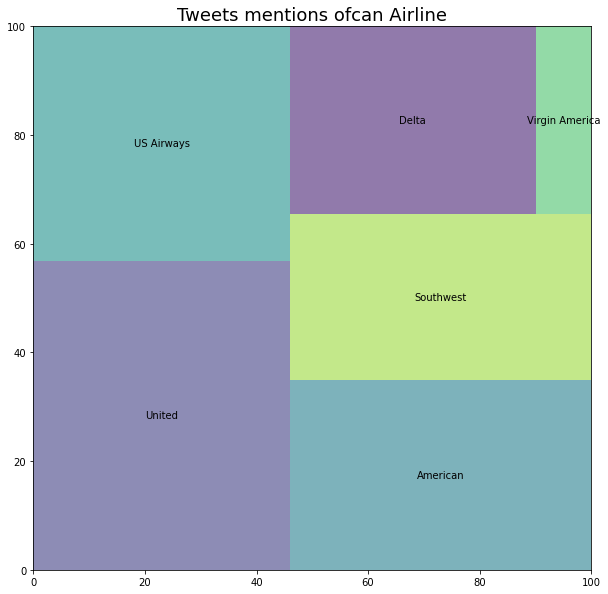

In [80]:
import squarify
labels = ['United','US Airways','American','Southwest','Delta','Virgin America']
sizes = [0.261, 0.198, 0.188, 0.165, 0.152, 0.0344]

colors = ['blue','yellow','green','orange', 'red', 'purple']
plt.subplots(figsize=(10,10))
#ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
squarify.plot(sizes=sizes, label=labels, alpha=0.6)
plt.title('Tweets mentions ofcan Airline', fontsize=18)

In [81]:
label = ['positive','negative','neutral']
final_df['sentiment'].value_counts()


neutral     5528
positive    5459
negative    3653
Name: sentiment, dtype: int64

Text(0, 0.5, 'Mood')

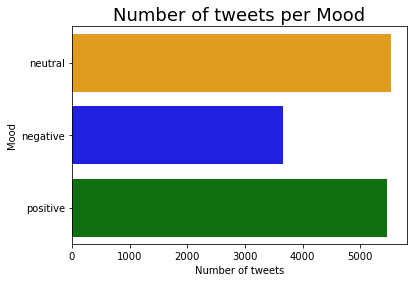

In [82]:
sns.countplot(y='sentiment', data=final_df, palette=['orange','blue','green'])
plt.title('Number of tweets per Mood', fontsize=18)
plt.xlabel('Number of tweets')
plt.ylabel('Mood')

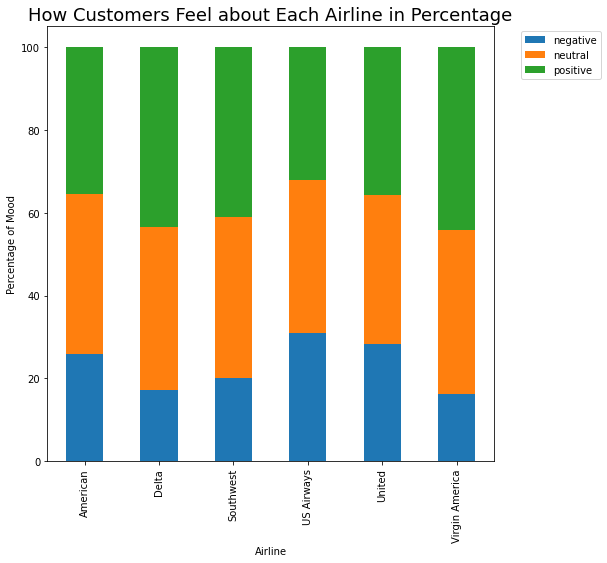

In [83]:
cross1 = pd.crosstab(final_df.airline, final_df.sentiment).apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar',title='How Customers Feel about Each Airline in Percentage',figsize=(8,8),stacked=True)
cross1.title.set_size(18)
cross1.set_xlabel('Airline')
cross1.set_ylabel('Percentage of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [84]:
pd.crosstab(final_df.airline, final_df.sentiment)

sentiment       negative  neutral  positive
airline                                    
American             716     1066       977
Delta                381      878       963
Southwest            489      937       994
US Airways           902     1073       938
United              1083     1374      1365
Virgin America        82      200       222

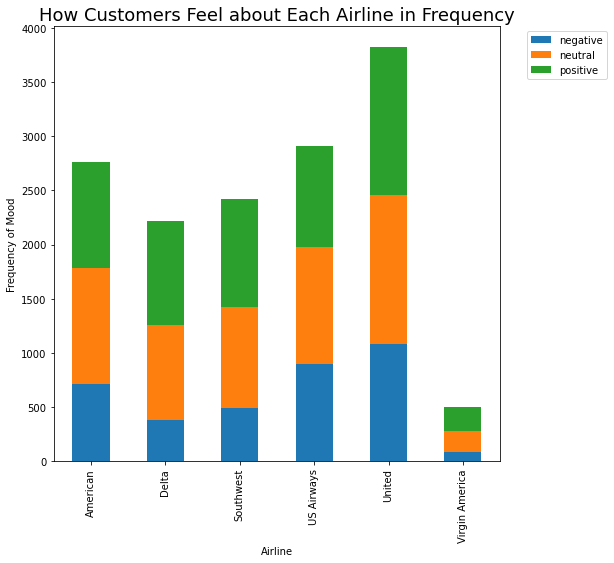

In [85]:
cross2 = pd.crosstab(final_df.airline, final_df.sentiment).plot(kind="bar",title='How Customers Feel about Each Airline in Frequency',figsize=(8,8),stacked=True)
cross2.title.set_size(18)
cross2.set_xlabel('Airline')
cross2.set_ylabel('Frequency of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

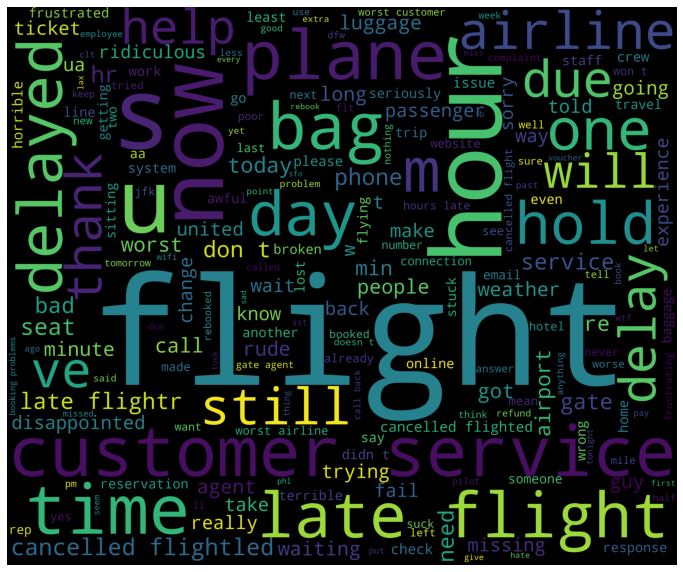

In [86]:
df_negative = final_df[final_df['sentiment']=='negative']
words = ' '.join(df_negative['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

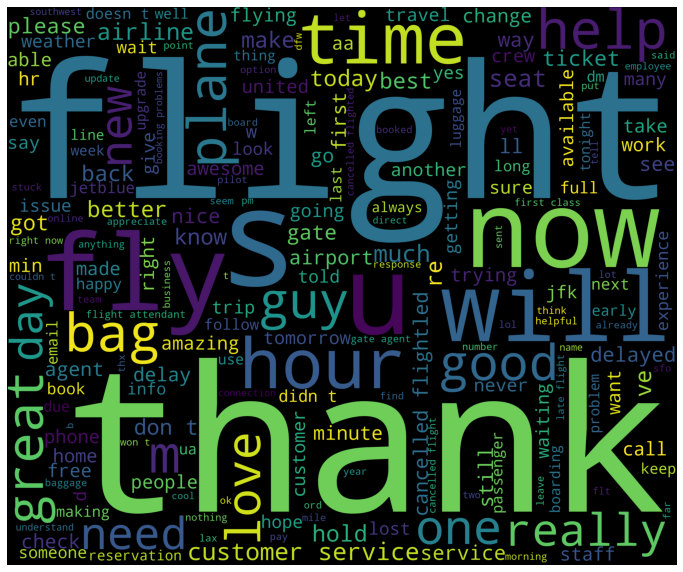

In [87]:
df_postive = final_df [final_df['sentiment']=='positive']
words = ' '.join(df_postive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

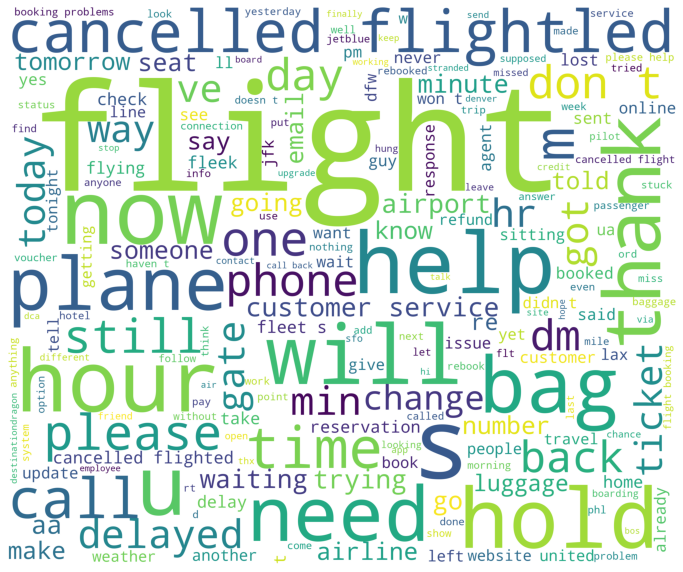

In [89]:
df_neutral = final_df[final_df['sentiment']=='neutral']
words = ' '.join(df_neutral['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()